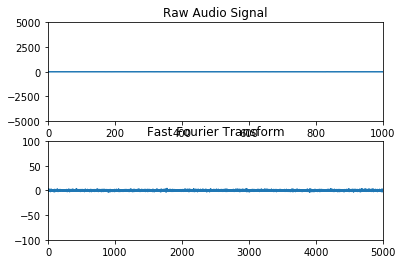


+---------------------------------+
| Press Ctrl+C to Break Recording |
+---------------------------------+



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


<Figure size 432x288 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


In [1]:
try:
    import pyaudio
    import numpy as np
    import pylab
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    import time
    import sys
    import seaborn as sns
except:
    print("Something didn't import")

i=0
f,ax = plt.subplots(2)

# Prepare the Plotting Environment with random starting values
x = np.arange(10000)
y = np.random.randn(10000)

# Plot 0 is for raw audio data
li, = ax[0].plot(x, y)
ax[0].set_xlim(0,1000)
ax[0].set_ylim(-5000,5000)
ax[0].set_title("Raw Audio Signal")
# Plot 1 is for the FFT of the audio
li2, = ax[1].plot(x, y)
ax[1].set_xlim(0,5000)
ax[1].set_ylim(-100,100)
ax[1].set_title("Fast Fourier Transform")
# Show the plot, but without blocking updates
plt.pause(0.01)
plt.tight_layout()

FORMAT = pyaudio.paInt16 # We use 16bit format per sample
CHANNELS = 1
RATE = 44100
CHUNK = 1024 # 1024bytes of data red from a buffer
RECORD_SECONDS = 0.1
WAVE_OUTPUT_FILENAME = "file.wav"

audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True)#,
                    #frames_per_buffer=CHUNK)

global keep_going
keep_going = True

def plot_data(in_data):
    # get and convert the data to float
    audio_data = np.fromstring(in_data, np.int16)
    # Fast Fourier Transform, 10*log10(abs) is to scale it to dB
    # and make sure it's not imaginary
    dfft = 10.*np.log10(abs(np.fft.rfft(audio_data)))

    # Force the new data into the plot, but without redrawing axes.
    # If uses plt.draw(), axes are re-drawn every time
    #print audio_data[0:10]
    #print dfft[0:10]
    #print
    li.set_xdata(np.arange(len(audio_data)))
    li.set_ydata(audio_data)
    li2.set_xdata(np.arange(len(dfft))*10.)
    li2.set_ydata(dfft)

    # Show the updated plot, but without blocking
    plt.pause(0.01)
    if keep_going:
        return True
    else:
        return False

# Open the connection and start streaming the data
stream.start_stream()
print("\n+---------------------------------+")
print("| Press Ctrl+C to Break Recording |")
print("+---------------------------------+\n")

# Loop so program doesn't end while the stream callback's
# itself for new data
while keep_going:
    try:
        plot_data(stream.read(CHUNK))
    except KeyboardInterrupt:
        keep_going=False
    except:
        pass

# Close up shop (currently not used because KeyboardInterrupt
# is the only way to close)
stream.stop_stream()
stream.close()

audio.terminate()